# Time‑Series Exploration Lab

This notebook walks through an exploratory analysis of a single stock’s daily closing price. We’ll clean the data, engineer calendar features, visualise patterns, and inspect the main time‑series diagnostics (rolling averages, autocorrelation, and seasonal decomposition).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('seaborn-v0_8')
pd.set_option('display.width', 120)
pd.set_option('display.precision', 2)



In [2]:
DATA_PATH = 'data.csv'   

ts_data = pd.read_csv(DATA_PATH, parse_dates=['Date'])
ts_data = ts_data.rename(columns={'Date': 'date'}).set_index('date').sort_index()

display(ts_data.head())
print(f"Shape: {ts_data.shape}, Date range: {ts_data.index.min().date()} → {ts_data.index.max().date()}")



,Open,High,Low,Close
date,,,,
2004-10-18,482.58,482.58,473.51,478.04
2004-10-19,476.23,480.76,474.41,475.32
2004-10-20,477.14,478.95,468.06,468.06
2004-10-21,468.06,471.69,462.62,468.06
2004-10-24,472.60,476.23,457.18,467.16


Shape: (3834, 4), Date range: 2004-10-18 → 2024-11-20


In [3]:

# Quick NA check
na_counts = ts_data.isna().sum()
if na_counts.any():
    print('Columns with missing values:')
    print(na_counts[na_counts > 0])
else:
    print('No missing values found.')



No missing values found.


In [4]:

# --- 2. Calendar feature engineering -------------------------------------
ts_data['weekday_name']  = ts_data.index.day_name()
ts_data['day_of_month']  = ts_data.index.day
ts_data['month']         = ts_data.index.month
ts_data['year']          = ts_data.index.year
ts_data['week_of_year']  = ts_data.index.isocalendar().week.astype(int)

ts_data.head()



,Open,High,Low,Close,weekday_name,day_of_month,month,year,week_of_year
date,,,,,,,,,
2004-10-18,482.58,482.58,473.51,478.04,Monday,18,10,2004,43
2004-10-19,476.23,480.76,474.41,475.32,Tuesday,19,10,2004,43
2004-10-20,477.14,478.95,468.06,468.06,Wednesday,20,10,2004,43
2004-10-21,468.06,471.69,462.62,468.06,Thursday,21,10,2004,43
2004-10-24,472.60,476.23,457.18,467.16,Sunday,24,10,2004,43


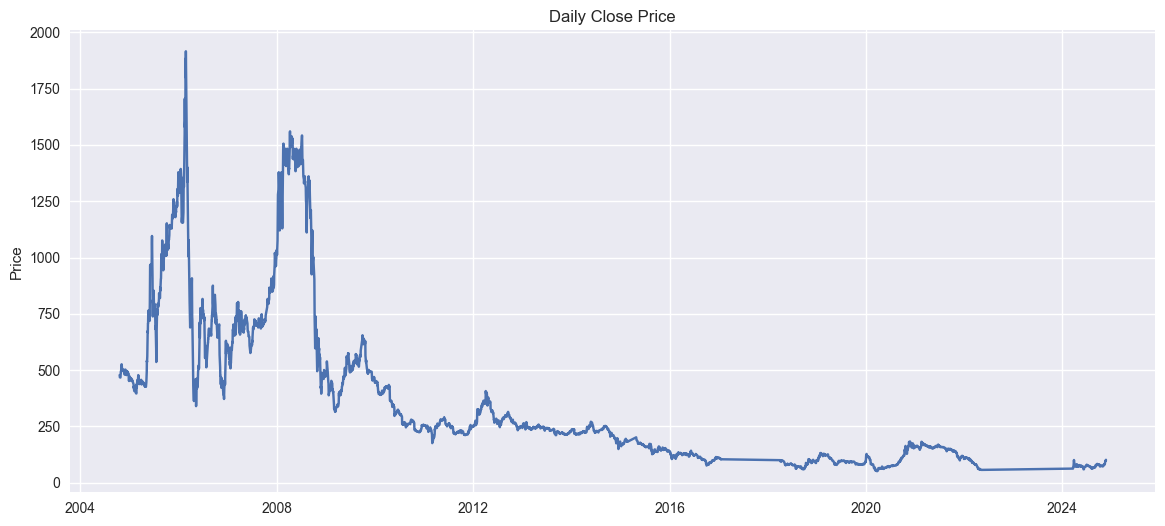

In [5]:

# --- 3. Visual exploration ----------------------------------------------
fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data=ts_data['Close'], ax=ax)
ax.set(title='Daily Close Price', xlabel='', ylabel='Price')
plt.show()



C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_9460\3318430350.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_data['Close'].resample('Y').mean().plot(ax=ax, marker='o')


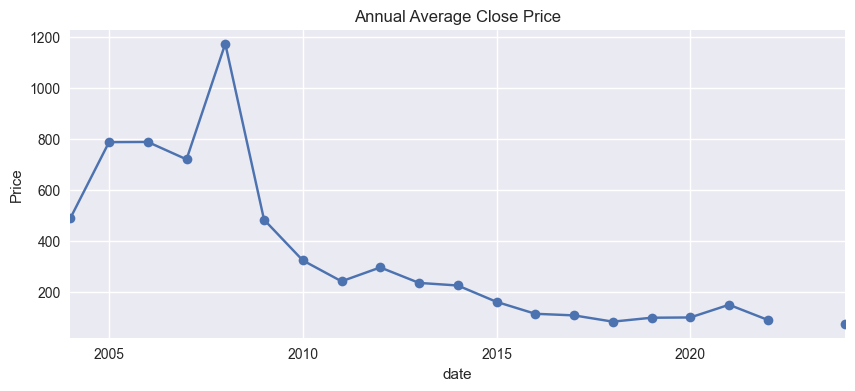

In [6]:

fig, ax = plt.subplots(figsize=(10, 4))
ts_data['Close'].resample('Y').mean().plot(ax=ax, marker='o')
ax.set(title='Annual Average Close Price', ylabel='Price')
plt.show()



C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_9460\1654188457.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(ts_data['Close'].resample('M').mean())


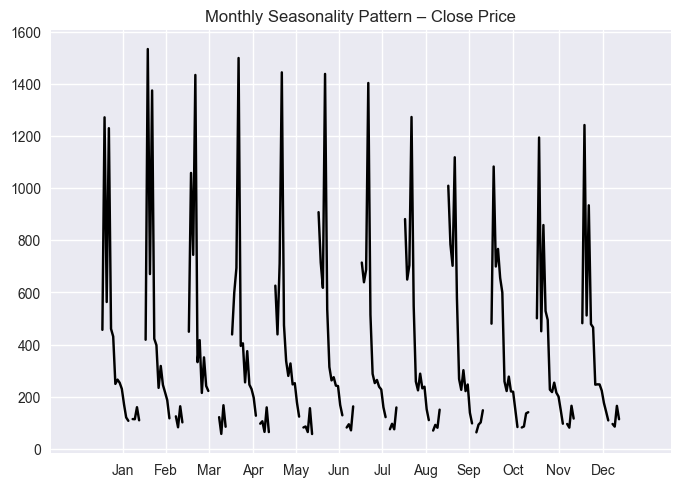

In [7]:

month_plot(ts_data['Close'].resample('M').mean())
plt.title('Monthly Seasonality Pattern – Close Price')
plt.show()



c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


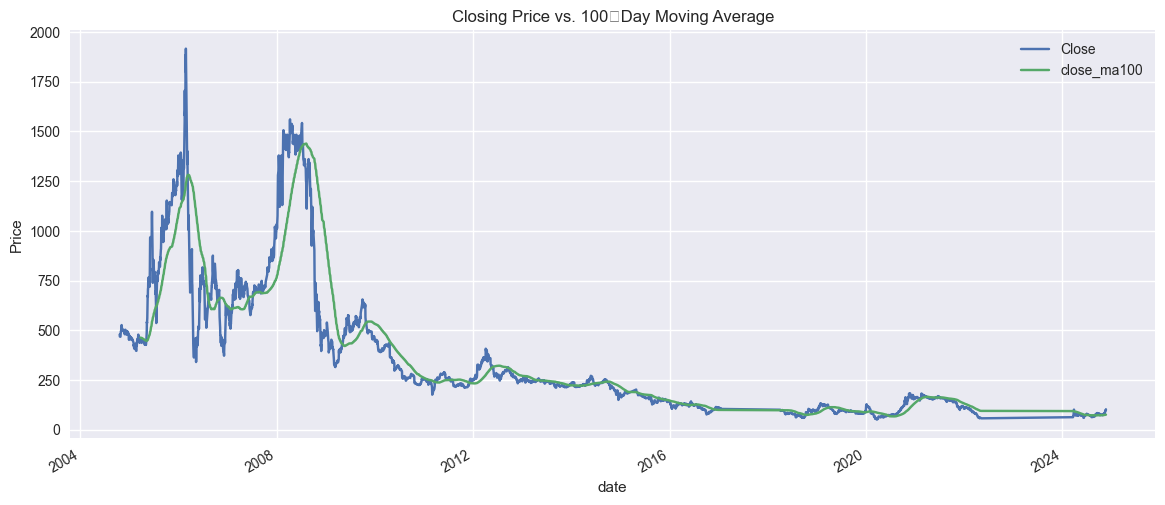

In [8]:

# 100‑day moving average
ts_data['close_ma100'] = ts_data['Close'].rolling(100).mean()

fig, ax = plt.subplots(figsize=(14, 6))
ts_data[['Close', 'close_ma100']].plot(ax=ax)
ax.set(title='Closing Price vs. 100‑Day Moving Average', ylabel='Price')
plt.show()



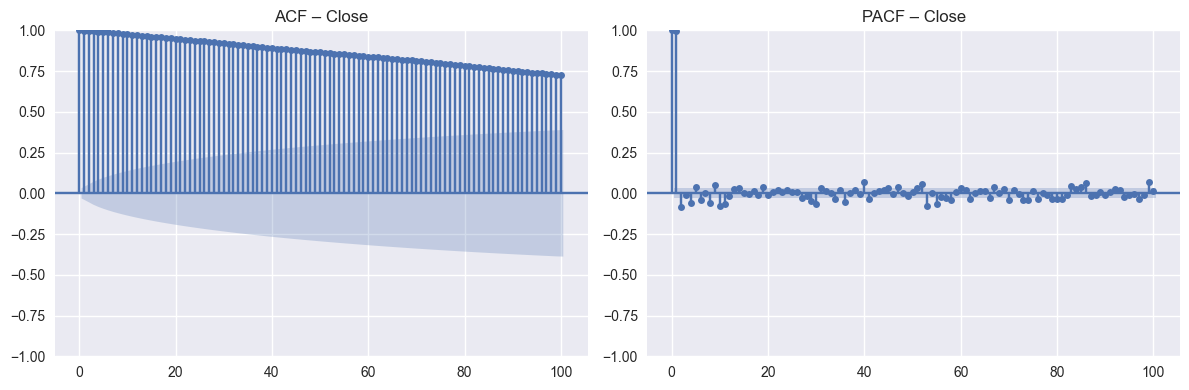

In [9]:

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(ts_data['Close'], lags=100, ax=ax[0])
plot_pacf(ts_data['Close'], lags=100, ax=ax[1])
ax[0].set_title('ACF – Close')
ax[1].set_title('PACF – Close')
plt.tight_layout()
plt.show()



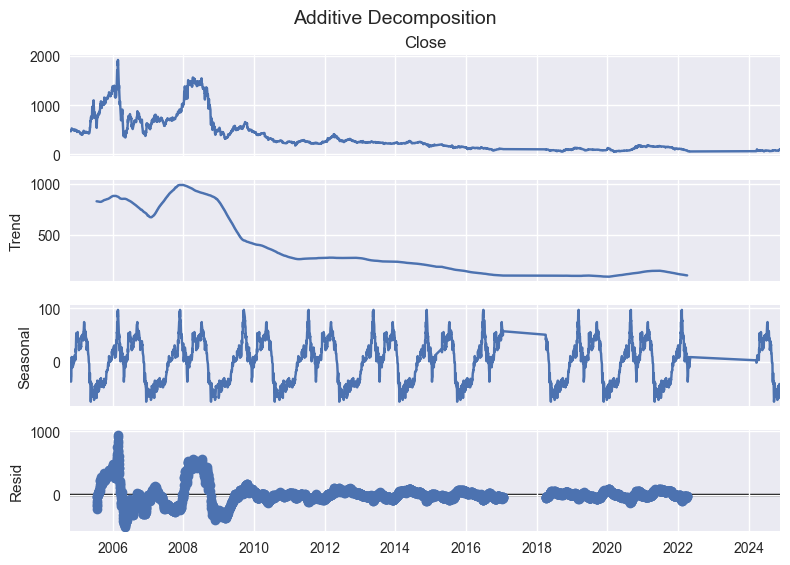

In [10]:

# --- 4. Seasonal decomposition -------------------------------------------
additive = seasonal_decompose(ts_data['Close'], model='additive', period=365)
additive.plot()
plt.suptitle('Additive Decomposition', y=1.02, fontsize=14)
plt.show()



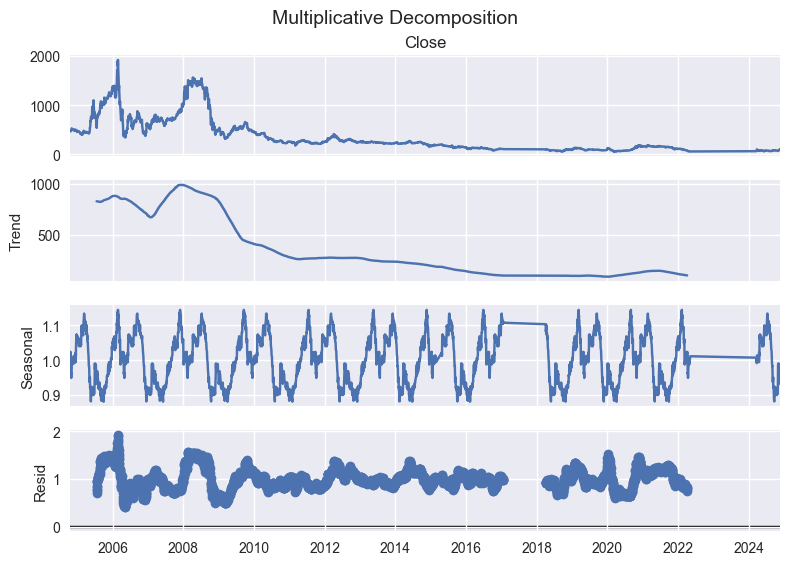

In [11]:

multiplicative = seasonal_decompose(ts_data['Close'], model='multiplicative', period=365)
multiplicative.plot()
plt.suptitle('Multiplicative Decomposition', y=1.02, fontsize=14)
plt.show()

